# Data Analysis with Pandas

## 1. Pandas / Matplotlib plotting

### 1.1. DataFrame.describe()

In [1]:
import io
import requests
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

from IPython.display import display

print (sys.version)

np.random.seed(1)
x = 2
data = np.random.normal(size=(100, 2)) + [x, x]

data_df = pd.DataFrame(data=data, columns = ['x', 'y'])
print('data:')
display(data_df.describe())

Populating the interactive namespace from numpy and matplotlib
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
data:


,x,y
count,100.000000,100.000000
mean,2.226655,1.986722
std,0.863435,0.947895
min,0.142018,-0.434838
25%,1.692818,1.373103
50%,2.214197,2.038106
75%,2.804134,2.617497
max,4.528326,4.186980


### 1.2. DataFrame.corr()

In [2]:
display(data_df.corr())

,x,y
x,1.000000,-0.141254
y,-0.141254,1.000000


### 1.3. Seaborn.pairplot(DataFrame, diag_kind = 'kde')

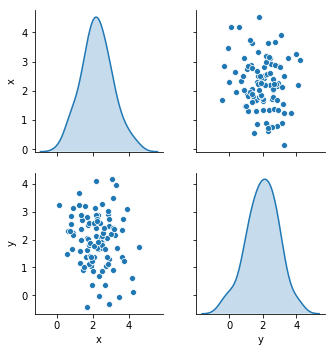

In [3]:
ax = sns.pairplot(data_df, diag_kind='kde')

### 1.4. Seaborn.jointplot(x_col, y_col, DataFrame)

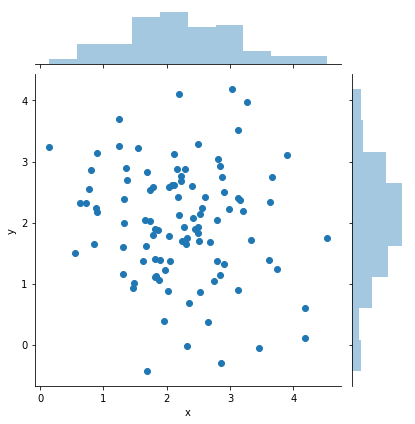

In [4]:
ax = sns.jointplot(x='x', y='y', data=data_df)

### 1.5. Seaborn.heatmap(DataFrame)

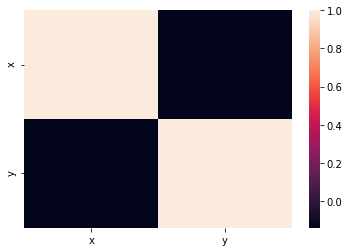

In [5]:
ax = sns.heatmap(data_df.corr())

### 1.6. Seaborn.distplot(DataFrame['column_name'])

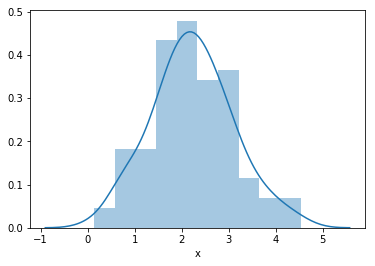

In [6]:
ax = sns.distplot(data_df['x'])

### 1.7. DataFrame.plot.bar()

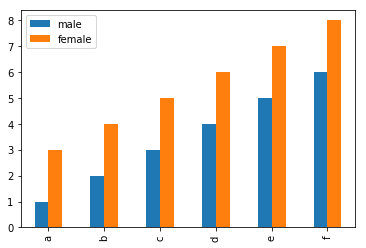

In [7]:
data = np.array([[1, 2, 3, 4, 5, 6],[3, 4, 5, 6, 7, 8]])
example_df = pd.DataFrame(data=np.transpose(data), index = ['a', 'b', 'c', 'd', 'e', 'f'], columns=['male', 'female'])

ax = example_df.plot.bar()

### 1.8. Scatter plot

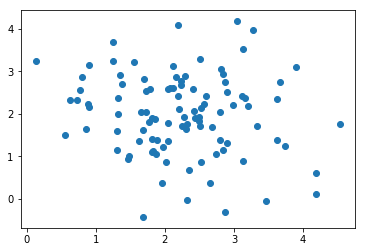

In [8]:
np.random.seed(1)
x = 2
data = np.random.normal(size=(100, 2)) + [ x, x]

ax = plt.scatter(data[:,0], data[:,1])

### 1.9 Line graph

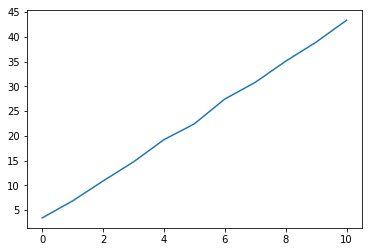

In [9]:
m = 11
step = 1.0 / (m - 1)
x = np.arange(m)
np.random.seed(1)
noise = 0.25 * np.random.randn(m)
params = np.array([3, 4])
y = params[0] + params[1] * x + noise

"""Plot the data"""
ax = plt.plot(x, y)

### 1.10 Box Plots

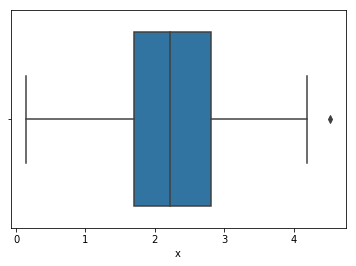

In [10]:
ax = sns.boxplot(x = 'x', data = data_df)
#ax = sns.boxplot(x = column, y = target, data = data_df, order = order)

## 2. Pandas

### 2.1 Pandas accessing elements

In [11]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({'value': values, 'even': values % 2 == 0, 'above_three': values > 3},
                          index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Examine DataFrame
print('example_df')
display(example_df)

display(example_df['value'])
display(example_df.loc['a'])
display(example_df.loc[['a', 'b']])
display(example_df.iloc[[1,2]])
display(example_df.iloc[:2])

example_df


,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


a    1
b    3
c    2
d    4
e    1
f    6
g    4
Name: value, dtype: int64

value              1
even           False
above_three    False
Name: a, dtype: object

,value,even,above_three
a,1,False,False
b,3,False,False


,value,even,above_three
b,3,False,False
c,2,True,False


,value,even,above_three
a,1,False,False
b,3,False,False


### 2.2 groupby

In [12]:
grouped_data = example_df.groupby('even')

print('grouped_data groups')
display(grouped_data.groups)

example_df.loc[list(grouped_data.groups[True])]

grouped_data = example_df.groupby(['even', 'above_three'])

print('grouped_data count')
display(grouped_data.count())

# The groups attribute is a dictionary mapping keys to lists of row indexes
print('grouped_data groups')
display(grouped_data.groups)

display(example_df.loc[list(grouped_data.groups[(False, False)])])

for key, value in grouped_data.groups.items():
    display('key = ', key, 'value = ', value)
    display(example_df.loc[list(value)])

grouped_data groups


{False: Index(['a', 'b', 'e'], dtype='object'),
 True: Index(['c', 'd', 'f', 'g'], dtype='object')}

grouped_data count


value
even  above_three       
False False            3
True  False            1
      True             3

grouped_data groups


{(False, False): Index(['a', 'b', 'e'], dtype='object'),
 (True, False): Index(['c'], dtype='object'),
 (True, True): Index(['d', 'f', 'g'], dtype='object')}

,value,even,above_three
a,1,False,False
b,3,False,False
e,1,False,False


'key = '

(False, False)

'value = '

Index(['a', 'b', 'e'], dtype='object')

,value,even,above_three
a,1,False,False
b,3,False,False
e,1,False,False


'key = '

(True, False)

'value = '

Index(['c'], dtype='object')

,value,even,above_three
c,2,True,False


'key = '

(True, True)

'value = '

Index(['d', 'f', 'g'], dtype='object')

,value,even,above_three
d,4,True,True
f,6,True,True
g,4,True,True


### 2.3. Groupby / Filter / Order

#### 2.3.1. Tips data

In [22]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv'
s = requests.get(url).content
tips = pd.read_csv(io.StringIO(s.decode('utf-8')))

print('tips shape:', tips.shape)
display(tips.head())

tips shape: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
display(tips.nlargest(15, columns='tip').tail(10))

,total_bill,tip,sex,smoker,day,time,size
183,23.17,6.50,Male,Yes,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
47,32.40,6.00,Male,No,Sun,Dinner,4
239,29.03,5.92,Male,No,Sat,Dinner,3
88,24.71,5.85,Male,No,Thur,Lunch,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4


In [24]:
# Tips for the largest 2 bills for each day of the week
# 1. Sort the df by total_bill in descending order
# 2. Groupby day
# 3. Number each item in each group from 1 to the length of that group.
# 4. Create a new column called rn to store these values
# 5. Get all rows where the values of rn is less than 3
# 6. Sort on day and rn

temp = tips.assign(rn=tips.sort_values(['total_bill'], ascending=False).groupby(['day']).cumcount() + 1)
display(temp.head())
display(temp.query('rn < 3').sort_values(['day', 'rn']))

,total_bill,tip,sex,smoker,day,time,size,rn
0,16.99,1.01,Female,No,Sun,Dinner,2,49
1,10.34,1.66,Male,No,Sun,Dinner,3,68
2,21.01,3.50,Male,No,Sun,Dinner,3,34
3,23.68,3.31,Male,No,Sun,Dinner,2,27
4,24.59,3.61,Female,No,Sun,Dinner,4,23


,total_bill,tip,sex,smoker,day,time,size,rn
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1
90,28.97,3.00,Male,Yes,Fri,Dinner,2,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1
212,48.33,9.00,Male,No,Sat,Dinner,4,2
156,48.17,5.00,Male,No,Sun,Dinner,6,1
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4,1
142,41.19,5.00,Male,No,Thur,Lunch,5,2


In [25]:
# Tips for the largest 2 bills for each day of the week
# 1. Group total bill by day
# 2. Rank in descending order - number each item in each group from 1 to the length of that group.
# 3. Create a new column called rnk to store these values
# 4. Get all rows where the values of rnk is less than 3
# 6. Sort on day and rnk

temp = tips.assign(rnk=tips.groupby(['day'])['total_bill'].rank(method='first', ascending=False))
display(temp.query('rnk < 3').sort_values(['day', 'rnk']))

,total_bill,tip,sex,smoker,day,time,size,rnk
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.0
90,28.97,3.00,Male,Yes,Fri,Dinner,2,2.0
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1.0
212,48.33,9.00,Male,No,Sat,Dinner,4,2.0
156,48.17,5.00,Male,No,Sun,Dinner,6,1.0
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.0
197,43.11,5.00,Female,Yes,Thur,Lunch,4,1.0
142,41.19,5.00,Male,No,Thur,Lunch,5,2.0


In [26]:
temp = tips[tips['tip'] < 2].assign(rnk_min=tips.groupby(['sex'])['tip'].rank(method='min'))
display(temp.query('rnk_min < 3').sort_values(['sex', 'rnk_min']))

,total_bill,tip,sex,smoker,day,time,size,rnk_min
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.0
92,5.75,1.00,Female,Yes,Fri,Dinner,2,1.0
111,7.25,1.00,Female,No,Sat,Dinner,1,1.0
236,12.60,1.00,Male,Yes,Sat,Dinner,2,1.0
237,32.83,1.17,Male,Yes,Sat,Dinner,2,2.0


In [28]:
display(tips.loc[tips['tip'] < 2, 'tip'])

0      1.01
1      1.66
8      1.96
10     1.71
12     1.57
16     1.67
30     1.45
43     1.32
53     1.56
57     1.50
58     1.76
62     1.98
67     1.00
70     1.97
75     1.25
82     1.83
92     1.00
97     1.50
99     1.50
105    1.64
111    1.00
117    1.50
118    1.80
121    1.68
126    1.48
130    1.50
132    1.50
135    1.25
145    1.50
146    1.36
147    1.63
148    1.73
168    1.61
190    1.50
195    1.44
215    1.10
217    1.50
218    1.44
222    1.92
224    1.58
233    1.47
235    1.25
236    1.00
237    1.17
242    1.75
Name: tip, dtype: float64

#### 2.3.2. Customers & Orders

In [29]:
orders = pd.DataFrame(columns = ['customerid', 'order_date', 'item', 'quantity', 'price'],
                         data = [[10330, '30-Jun-1999', 'Pogo stick',          1,   28.00],
                                 [10101, '30-Jun-1999', 'Raft',                1,   58.00],
                                 [10298, '01-Jul-1999', 'Skateboard',          1,   33.00],
                                 [10101, '01-Jul-1999', 'Life Vest',           4,  125.00],
                                 [10299, '06-Jul-1999', 'Parachute',           1, 1250.00],
                                 [10339, '27-Jul-1999', 'Umbrella',            1,    4.50],
                                 [10449, '13-Aug-1999', 'Unicycle',            1,  180.79],
                                 [10439, '14-Aug-1999', 'Ski Poles',           2,   25.50],
                                 [10101, '18-Aug-1999', 'Rain Coat',           1,   18.30],
                                 [10449, '01-Sep-1999', 'Snow Shoes',          1,   45.00],
                                 [10439, '18-Sep-1999', 'Tent',                1,   88.00],
                                 [10298, '19-Sep-1999', 'Lantern',             2,   29.00],
                                 [10410, '28-Oct-1999', 'Sleeping Bag',        1,   89.22],
                                 [10438, '01-Nov-1999', 'Umbrella',            1,    6.75],
                                 [10438, '02-Nov-1999', 'Pillow',              1,    8.50],
                                 [10298, '01-Dec-1999', 'Helmet',              1,   22.00],
                                 [10449, '15-Dec-1999', 'Bicycle',             1,  380.50],
                                 [10449, '22-Dec-1999', 'Canoe',               1,  280.00],
                                 [10101, '30-Dec-1999', 'Hoola Hoop',          3,   14.75],
                                 [10330, '01-Jan-2000', 'Flashlight',          4,   28.00],
                                 [10101, '02-Jan-2000', 'Lantern',             1,   16.00],
                                 [10299, '18-Jan-2000', 'Inflatable Mattress', 1,   38.00],
                                 [10438, '18-Jan-2000', 'Tent',                1,   79.99],
                                 [10413, '19-Jan-2000', 'Lawnchair',           4,   32.00],
                                 [10410, '30-Jan-2000', 'Unicycle',            1,  192.50],
                                 [10315, '02-Feb-2000', 'Compass',             1,    8.00],
                                 [10449, '29-Feb-2000', 'Flashlight',          1,    4.50],
                                 [10101, '08-Mar-2000', 'Sleeping Bag',        2,   88.70],
                                 [10298, '18-Mar-2000', 'Pocket Knife',        1,   22.38],
                                 [10449, '19-Mar-2000', 'Canoe paddle',        2,   40.00],
                                 [10298, '01-Apr-2000', 'Ear Muffs',           1,   12.50],
                                 [10330, '19-Apr-2000', 'Shovel',              1,   16.75]])

customers = pd.DataFrame( columns = ['customerid', 'firstname', 'lastname', 'city', 'state'],
                             data = [[ 10101, 'John',     'Gray',     'Lynden',       'Washington'     ],
                                     [ 10298, 'Leroy',    'Brown',    'Pinetop',      'Arizona'        ],
                                     [ 10299, 'Elroy',    'Keller',   'Snoqualmie',   'Washington'     ],
                                     [ 10315, 'Lisa',     'Jones',    'Oshkosh',      'Wisconsin'      ],
                                     [ 10325, 'Ginger',   'Schultz',  'Pocatello',    'Idaho'          ],
                                     [ 10329, 'Kelly',    'Mendoza',  'Kailua',       'Hawaii'         ],
                                     [ 10330, 'Shawn',    'Dalton',   'Cannon Beach', 'Oregon'         ],
                                     [ 10338, 'Michael',  'Howell',   'Tillamook',    'Oregon'         ],
                                     [ 10339, 'Anthony',  'Sanchez',  'Winslow',      'Arizona'        ],
                                     [ 10408, 'Elroy',    'Cleaver',  'Globe',        'Arizona'        ],
                                     [ 10410, 'Mary Ann', 'Howell',   'Charleston',   'South Carolina' ],
                                     [ 10413, 'Donald',   'Davids',   'Gila Bend',    'Arizona'        ],
                                     [ 10419, 'Linda',    'Sakahara', 'Nogales',      'Arizona'        ],
                                     [ 10429, 'Sarah',    'Graham',   'Greensboro',   'North Carolina' ],
                                     [ 10438, 'Kevin',    'Smith',    'Durango',      'Colorado'       ],
                                     [ 10439, 'Conrad',   'Giles',    'Telluride',    'Colorado'       ],
                                     [ 10449, 'Isabela',  'Moore',    'Yuma',         'Arizona'        ]])

display(orders.head())
display(customers.head())

,customerid,order_date,item,quantity,price
0,10330,30-Jun-1999,Pogo stick,1,28.0
1,10101,30-Jun-1999,Raft,1,58.0
2,10298,01-Jul-1999,Skateboard,1,33.0
3,10101,01-Jul-1999,Life Vest,4,125.0
4,10299,06-Jul-1999,Parachute,1,1250.0


,customerid,firstname,lastname,city,state
0,10101,John,Gray,Lynden,Washington
1,10298,Leroy,Brown,Pinetop,Arizona
2,10299,Elroy,Keller,Snoqualmie,Washington
3,10315,Lisa,Jones,Oshkosh,Wisconsin
4,10325,Ginger,Schultz,Pocatello,Idaho


In [30]:
# df.isin()

the_states = set(['Arizona', 'Oregon'])

display(customers[customers['state'].isin(the_states)])

,customerid,firstname,lastname,city,state
1,10298,Leroy,Brown,Pinetop,Arizona
6,10330,Shawn,Dalton,Cannon Beach,Oregon
7,10338,Michael,Howell,Tillamook,Oregon
8,10339,Anthony,Sanchez,Winslow,Arizona
9,10408,Elroy,Cleaver,Globe,Arizona
11,10413,Donald,Davids,Gila Bend,Arizona
12,10419,Linda,Sakahara,Nogales,Arizona
16,10449,Isabela,Moore,Yuma,Arizona


In [31]:
# Number of customers in each state

display(customers.groupby('state').size().sort_values(ascending=False))
display(len(customers['state'].unique()))

state
Arizona           6
Washington        2
Oregon            2
Colorado          2
Wisconsin         1
South Carolina    1
North Carolina    1
Idaho             1
Hawaii            1
dtype: int64

9

### 2.4. Merge / Join

#### 2.4.1. Inner Join (default)

In [32]:
cno = pd.merge(customers, orders)
display(cno.head())

,customerid,firstname,lastname,city,state,order_date,item,quantity,price
0,10101,John,Gray,Lynden,Washington,30-Jun-1999,Raft,1,58.00
1,10101,John,Gray,Lynden,Washington,01-Jul-1999,Life Vest,4,125.00
2,10101,John,Gray,Lynden,Washington,18-Aug-1999,Rain Coat,1,18.30
3,10101,John,Gray,Lynden,Washington,30-Dec-1999,Hoola Hoop,3,14.75
4,10101,John,Gray,Lynden,Washington,02-Jan-2000,Lantern,1,16.00


In [33]:
# Biggest Spenders by price

print('How much each cutomer spent')
display(cno.groupby(['customerid', 'firstname',
                     'lastname', 'city', 'state'])['price'].sum().sort_values(ascending=False))

How much each cutomer spent


customerid  firstname  lastname  city          state         
10299       Elroy      Keller    Snoqualmie    Washington        1288.00
10449       Isabela    Moore     Yuma          Arizona            930.79
10101       John       Gray      Lynden        Washington         320.75
10410       Mary Ann   Howell    Charleston    South Carolina     281.72
10298       Leroy      Brown     Pinetop       Arizona            118.88
10439       Conrad     Giles     Telluride     Colorado           113.50
10438       Kevin      Smith     Durango       Colorado            95.24
10330       Shawn      Dalton    Cannon Beach  Oregon              72.75
10413       Donald     Davids    Gila Bend     Arizona             32.00
10315       Lisa       Jones     Oshkosh       Wisconsin            8.00
10339       Anthony    Sanchez   Winslow       Arizona              4.50
Name: price, dtype: float64

In [34]:
# Biggest Spenders by qty

print('How many items each cutomer bought and how much they spent')
display(cno.groupby(['customerid', 'firstname',
                     'lastname', 'city', 'state'])['quantity', 'price'].sum().sort_values('price', ascending=False))

How many items each cutomer bought and how much they spent


,,,,,quantity,price
customerid,firstname,lastname,city,state,,
10299,Elroy,Keller,Snoqualmie,Washington,2,1288.00
10449,Isabela,Moore,Yuma,Arizona,7,930.79
10101,John,Gray,Lynden,Washington,12,320.75
10410,Mary Ann,Howell,Charleston,South Carolina,2,281.72
10298,Leroy,Brown,Pinetop,Arizona,6,118.88
10439,Conrad,Giles,Telluride,Colorado,3,113.50
10438,Kevin,Smith,Durango,Colorado,3,95.24
10330,Shawn,Dalton,Cannon Beach,Oregon,6,72.75
10413,Donald,Davids,Gila Bend,Arizona,4,32.00


In [35]:
# Biggest Spenders

print('How much each cutomer spent')
display(cno.groupby(['customerid', 'firstname',
                     'lastname', 'city', 'state'])['quantity', 'price'].sum().sort_values('price', ascending=False))

How much each cutomer spent


,,,,,quantity,price
customerid,firstname,lastname,city,state,,
10299,Elroy,Keller,Snoqualmie,Washington,2,1288.00
10449,Isabela,Moore,Yuma,Arizona,7,930.79
10101,John,Gray,Lynden,Washington,12,320.75
10410,Mary Ann,Howell,Charleston,South Carolina,2,281.72
10298,Leroy,Brown,Pinetop,Arizona,6,118.88
10439,Conrad,Giles,Telluride,Colorado,3,113.50
10438,Kevin,Smith,Durango,Colorado,3,95.24
10330,Shawn,Dalton,Cannon Beach,Oregon,6,72.75
10413,Donald,Davids,Gila Bend,Arizona,4,32.00


## 3. Examples

### 3.1. Cathleen Example

Find the names of highest paid people of each nationality

In [36]:
salaries = pd.DataFrame(columns = ['Name', 'Nationality', 'Income'],
                           data = [['A', 'Chinese',  10],
                                   ['B', 'Chinese',  20],
                                   ['C', 'American',  5],
                                   ['D', 'American', 30]])

display(salaries)

display(salaries.groupby('Nationality').max())

,Name,Nationality,Income
0,A,Chinese,10
1,B,Chinese,20
2,C,American,5
3,D,American,30


,Name,Income
Nationality,,
American,D,30
Chinese,B,20


### 3.2. Facebook Mock Interview 1

    events: timestamp | user_id | action | device_type
    users: user_id | created_at | age | notifications

    action = {‘like’, ‘comment’, ‘post’, ‘share’, ‘view profile’}
    device_type = {'browser', 'tablet', 'iphone', 'galaxy', 'pixel'}
    notifications = {'on', 'off'}

#### Q1: How many users who had notifications turned on were active on Facebook this past weekend using a mobile phone?

In [37]:
events = pd.DataFrame(columns = ['timestamp', 'user_id', 'action', 'device_type'],
                         data = [[0,  1, 'like',         'browser'],
                                 [1,  2, 'comment',      'iphone' ],
                                 [2,  4, 'post',         'iphone' ],
                                 [3,  3, 'share',        'iphone' ],
                                 [4,  5, 'view_profile', 'galaxy' ],
                                 [5,  6, 'like',         'pixel'  ],
                                 [6,  7, 'post',         'galaxy' ],
                                 [7,  3, 'like',         'pixel'  ],
                                 [8,  4, 'post',         'iphone' ],
                                 [9,  2, 'like',         'iphone' ],
                                 [10, 1, 'like',         'browser'],
                                 [11, 2, 'comment',      'iphone' ],
                                 [12, 4, 'post',         'iphone' ],
                                 [13, 3, 'share',        'iphone' ],
                                 [14, 5, 'view_profile', 'galaxy' ],
                                 [15, 6, 'like',         'pixel'  ],
                                 [16, 7, 'post',         'galaxy' ],
                                 [17, 3, 'like',         'pixel'  ],
                                 [18, 4, 'post',         'iphone' ],
                                 [19, 2, 'like',         'iphone' ]])


users = pd.DataFrame(columns = ['user_id', 'created_at', 'age', 'notifications'],
                        data = [[1, 0, 19, 'on'],
                                [2, 1, 20, 'off'],
                                [3, 0, 19, 'on'],
                                [4, 1, 19, 'off'],
                                [5, 3, 18, 'on'],
                                [6, 3, 17, 'on'],
                                [7, 3, 18, 'on']])

print('users with notifications on')
users_t = users[users['notifications'] == 'on']
display(users_t)

print('events the past weekend using a mobile phone')
t1 = 3  # weekend_start
t2 = 18 # weekend_end
mobile_devices = set(['iphone', 'galaxy', 'pixel'])
events_t = events[events['device_type'].isin(mobile_devices)
                  & (events['timestamp'] > t1) & (events['timestamp'] < t2)]
display(events_t)

table = pd.merge(users_t, events_t, how='inner', on='user_id')
display(table)
print('number of users = ', len(table['user_id'].unique()))

users with notifications on


,user_id,created_at,age,notifications
0,1,0,19,on
2,3,0,19,on
4,5,3,18,on
5,6,3,17,on
6,7,3,18,on


events the past weekend using a mobile phone


,timestamp,user_id,action,device_type
4,4,5,view_profile,galaxy
5,5,6,like,pixel
6,6,7,post,galaxy
7,7,3,like,pixel
8,8,4,post,iphone
9,9,2,like,iphone
11,11,2,comment,iphone
12,12,4,post,iphone
13,13,3,share,iphone
14,14,5,view_profile,galaxy


,user_id,created_at,age,notifications,timestamp,action,device_type
0,3,0,19,on,7,like,pixel
1,3,0,19,on,13,share,iphone
2,3,0,19,on,17,like,pixel
3,5,3,18,on,4,view_profile,galaxy
4,5,3,18,on,14,view_profile,galaxy
5,6,3,17,on,5,like,pixel
6,6,3,17,on,15,like,pixel
7,7,3,18,on,6,post,galaxy
8,7,3,18,on,16,post,galaxy


number of users =  4


#### Q2: What is the device type with the most number of unique users from the past 3 days?

In [38]:
events_t = events[(events['timestamp'] > t1) & (events['timestamp'] < t2)][['user_id', 'device_type']]
unique_users_per_device = events_t.groupby('device_type')['user_id'].unique().apply(len)
display(unique_users_per_device)
print('device with the most unique users =',unique_users_per_device[unique_users_per_device==unique_users_per_device.max()])

device_type
browser    1
galaxy     2
iphone     3
pixel      2
Name: user_id, dtype: int64

device with the most unique users = device_type
iphone    3
Name: user_id, dtype: int64


#### Q3: What if we wanted the top 3 most common device types?

In [39]:
print('Three most common device types:')
print(events[['user_id',
              'device_type']].groupby('device_type')['user_id'].unique().apply(len).sort_values(ascending=False).iloc[:3])

Three most common device types:
device_type
iphone    3
pixel     2
galaxy    2
Name: user_id, dtype: int64


#### Q4: For every unique user, give the counts of each action {'like', 'comment', 'post'} from the past 7 days.

In [139]:
acts = set(['like', 'comment', 'post'])
display(events[(events['timestamp'] > t1) & (events['timestamp'] < t2)
                & events['action'].isin(acts)].groupby('user_id')['action'].apply(pd.value_counts))

user_id         
1        like       1
2        comment    1
         like       1
3        like       2
4        post       2
6        like       2
7        post       2
Name: action, dtype: int64

### 3.3. Facebook Glassdoor

#### [Example 1](https://www.glassdoor.com/Interview/Write-an-SQL-query-that-makes-recommendations-using-the-pages-that-your-friends-liked-Assume-you-have-two-tables-a-two-c-QTN_1413464.htm)

Write an SQL query that makes recommendations using the pages that your friends liked.

Assume you have two tables: a two-column table of users and their friends, and a two-column table of users and the pages they liked.

It should not recommend pages you already like.

Want to find pages your friends liked that you did not.

In [22]:
from collections import Counter

friends = pd.DataFrame(columns = ['user', 'friend'],
                          data = [[0, 1],
                                  [0, 2],
                                  [1, 0],
                                  [1, 2],
                                  [2, 0],
                                  [2, 1],
                                  [2, 3]])
likes = pd.DataFrame(columns = ['user', 'page'],
                        data = [[0, 'a'],
                                [0, 'b'],
                                [0, 'c'],
                                [1, 'c'],
                                [1, 'd'],
                                [1, 'e'],
                                [2, 'e'],
                                [2, 'f'],
                                [2, 'a']])
print('friends table')
display(friends)
print()
print('likes table')
display(likes)

users = friends['user'].unique()
print('users = ', users)
print()

print('user_friends:')
user_friends = friends.groupby('user')['friend'].apply(set)
display(user_friends)

print('user_likes:')
user_likes = likes.groupby('user')['page'].apply(set)
display(user_likes)

friends table


,user,friend
0,0,1
1,0,2
2,1,0
3,1,2
4,2,0
5,2,1
6,2,3



likes table


,user,page
0,0,a
1,0,b
2,0,c
3,1,c
4,1,d
5,1,e
6,2,e
7,2,f
8,2,a


users =  [0 1 2]

user_friends:


user
0       {1, 2}
1       {0, 2}
2    {0, 1, 3}
Name: friend, dtype: object

user_likes:


user
0    {b, a, c}
1    {d, e, c}
2    {f, a, e}
Name: page, dtype: object

In [96]:
user_likes = likes.groupby('user')['page'].apply(set)

friend_likes = pd.merge(friends, likes,
                        how = 'inner', left_on = 'friend', right_on = 'user',
                        suffixes = ('', '_f'))[['user', 'page']])

grouped_friend_likes = friend_likes.groupby('user')['page'].apply(pd.value_counts)

print('page recommendations by user:')
page_recs = pd.Series(index=users, dtype=object)
for u in users:
    page_recs.at[u] = [(i, v) for (i, v) in grouped_friend_likes[u].iteritems() if i not in user_likes[u]]
print(page_recs)

page recommendations by user:
0    [(e, 2), (f, 1), (d, 1)]
1    [(a, 2), (f, 1), (b, 1)]
2    [(c, 2), (d, 1), (b, 1)]
dtype: object


In [236]:
print('user_likes:')
user_likes = likes.groupby('user')['page'].apply(set)
display(user_likes)

friend_likes = pd.merge(friends, likes, how = 'inner', left_on = 'friend', right_on = 'user', suffixes = ('', '_f'))
display(friend_likes)

grouped_friend_likes = friend_likes[['user', 'page']].groupby('user')['page'].apply(pd.value_counts)
display(grouped_friend_likes)
display(grouped_friend_likes[0])

print('page recommendations by user:')
page_recs = pd.Series(index=users, dtype=object)
for u in users:
    page_recs.at[u] = [(i, v) for (i, v) in grouped_friend_likes[u].iteritems() if i not in user_likes[u]]
print(page_recs)

user_likes:


user
0    {b, a, c}
1    {d, e, c}
2    {f, a, e}
Name: page, dtype: object

,user,friend,user_f,page
0,0,1,1,c
1,0,1,1,d
2,0,1,1,e
3,2,1,1,c
4,2,1,1,d
5,2,1,1,e
6,0,2,2,e
7,0,2,2,f
8,0,2,2,a
9,1,2,2,e


user   
0     e    2
      a    1
      f    1
      d    1
      c    1
1     a    2
      e    1
      f    1
      b    1
      c    1
2     c    2
      a    1
      e    1
      d    1
      b    1
Name: page, dtype: int64

e    2
a    1
f    1
d    1
c    1
Name: page, dtype: int64

page recommendations by user:


KeyError: 'user_id'

In [25]:
users = friends['user'].unique()
print('users = ', users)
print()

print('user_likes')
user_likes = likes.groupby('user')['page'].apply(set)
display(user_likes)

print('friend_likes')
friend_likes = pd.merge(friends, likes, how = 'inner',
                        left_on = 'friend', right_on = 'user').groupby('user_x')['page'].apply(set)
display(friend_likes)

print('page recommendations by user:')
page_recs = pd.Series(index=users, dtype=object)
for u in users:
    page_recs.at[u] = friend_likes[u] - user_likes[u]
print(page_recs)

users =  [0 1 2]

user_likes


user
0    {b, a, c}
1    {d, e, c}
2    {f, a, e}
Name: page, dtype: object

friend_likes


user_x
0    {c, d, f, a, e}
1    {c, b, f, a, e}
2    {c, d, b, a, e}
Name: page, dtype: object

page recommendations by user:
0    {f, d, e}
1    {b, f, a}
2    {b, d, c}
dtype: object


### 3.4. Facebook Glassdoor - General question style

Write a SQL query to compute a frequency table of a certain  attribute involving two joins.

- What if you want to GROUP or ORDER BY some attribute? What changes would you need to make?
- How would you account for NULLs?

#### [Example 2](https://www.glassdoor.ie/Interview/Write-a-SQL-query-to-compute-a-frequency-table-of-a-certain-attribute-involving-two-joins-What-if-you-want-to-GROUP-or-ORD-QTN_876012.htm)

You have a table Submissions with the submission_id, the body, and the parent_id. Submissions can be posts, or comments to a post.

- In posts, parent_id is null, and in comments, the parent_id is the post the comment is commenting about.

How would you make a histogram of number of posts per comment_count?

Want:

n_comments, n_posts

,sid,body,pid
0,0,a,NaN
1,1,b,NaN
2,2,ba,1.0
3,3,c,NaN
4,4,ca,3.0
5,5,cb,3.0
6,6,d,NaN
7,7,da,6.0
8,8,db,6.0
9,9,dc,6.0


post ids: {0, 1, 3, 6}

number of comments per parent id (if 1 or more)


pid
1.0    1
3.0    2
6.0    3
Name: sid, dtype: int64

posts_per_comment_count
3    1
2    1
1    1
0    1
Name: sid, dtype: int64


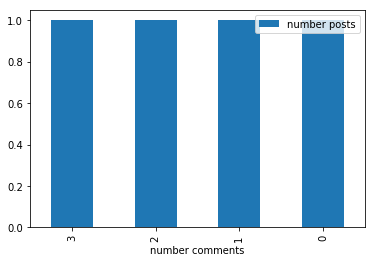

In [62]:
submissions = pd.DataFrame(columns = ['sid', 'body', 'pid'],
                              data = [[0, 'a',  np.nan],
                                      [1, 'b',  np.nan],
                                      [2, 'ba', 1     ],
                                      [3, 'c',  np.nan],
                                      [4, 'ca', 3     ],
                                      [5, 'cb', 3     ],
                                      [6, 'd',  np.nan],
                                      [7, 'da', 6     ],
                                      [8, 'db', 6     ],
                                      [9, 'dc', 6     ]])

display(submissions)

subids = submissions[['sid', 'pid']]

postids = set(subids['sid'][pd.isna(subids['pid'])])
print('post ids:', postids)
print()

print('number of comments per parent id (if 1 or more)')
n_comments_per_post = subids.groupby('pid')['sid'].apply(list).apply(len)
display(n_comments_per_post)

posts_per_comment_count = n_comments_per_post.value_counts()

posts_per_comment_count.at[0] = len(postids - set(n_comments_per_post.index.values))
print('posts_per_comment_count')
print(posts_per_comment_count)

data_df = pd.DataFrame(posts_per_comment_count)
data_df.columns = ['number posts']
data_df.index.name = 'number comments'
ax = data_df.plot.bar()

### 3.5. Facebook Glassdoor

#### [Example 3](https://www.glassdoor.com/Interview/SQL-questions-A-table-schema-with-tables-like-employee-department-employee-to-projects-projects-1-Select-empl-QTN_1536586.htm)

SQL questions - A table schema with tables like employee , department, employee_to_projects, projects
1. Select employee from departments where max salary of the department is 40k
2. Select employee assigned to projects
3. Select employee which have the max salary in a given department
4. Select employee with second highest salary
5. Table has two data entries every day for # of apples and oranges sold. write a query to get the difference between the apples and oranges sold on a given day

In [165]:
table = pd.DataFrame(columns = ['eid', 'dept', 'salary', 'project'],
                        data = [[1, 'a', 20, 'x'],
                                [2, 'a', 20, 'y'],
                                [3, 'a', 30, 'z'],
                                [4, 'b', 40, 'x'],
                                [5, 'b', 30, 'y'],
                                [6, 'b', 40, 'z'],
                                [7, 'c', 50, 'x'],
                                [8, 'c', 40, 'y'],
                                [9, 'c', 50, 'z']])

display(table)

# 1. Employees from departments where max salary is 40
max_salary_by_dept = table[['dept', 'salary']].groupby('dept')['salary'].max()
depts = set(max_salary_by_dept[max_salary_by_dept == 40].index.values)
print(depts)
print('Employees from departments where max salary is 40:')
display(table[table['dept'].isin(depts)])

# 2. Select employee assigned to projects

for p, t in table.groupby('project'):
    print('project:', p)
    display(t)

# 3. Select employee which have the max salary in a given department
max_salary_by_dept = table[['dept', 'salary']].groupby('dept')['salary'].max()
display(max_salary_by_dept)
new_table = table.copy()
display(new_table)
new_table['dept_max_salary'] = [max_salary_by_dept.loc[dept] for i, dept in table['dept'].iteritems()]
display(new_table)
print('Employees earning the max salary in their department')
display(new_table[new_table['salary']==new_table['dept_max_salary']])

# 4. Select employee with second highest salary

second_highest_salary = table['salary'].sort_values(ascending=False).unique()[1]
print('Employee with second highest salary:')
display(table[table['salary']==second_highest_salary])

# 5. Table has two data entries every day for # of apples and oranges sold.
#    Write a query to get the difference between the apples and oranges sold on a given day

items_sold = pd.DataFrame(columns = ['oranges', 'apples',],
                             data = [[23, 25],
                                     [31, 33],
                                     [42, 40],
                                     [53, 51],
                                     [24, 26],
                                     [35, 33],
                                     [34, 36],
                                     [29, 27],
                                     [31, 33],
                                     [40, 42]])
display(np.abs(items_sold['oranges']-items_sold['apples']))

,eid,dept,salary,project
0,1,a,20,x
1,2,a,20,y
2,3,a,30,z
3,4,b,40,x
4,5,b,30,y
5,6,b,40,z
6,7,c,50,x
7,8,c,40,y
8,9,c,50,z


{'b'}
Employees from departments where max salary is 40:


,eid,dept,salary,project
3,4,b,40,x
4,5,b,30,y
5,6,b,40,z


project: x


,eid,dept,salary,project
0,1,a,20,x
3,4,b,40,x
6,7,c,50,x


project: y


,eid,dept,salary,project
1,2,a,20,y
4,5,b,30,y
7,8,c,40,y


project: z


,eid,dept,salary,project
2,3,a,30,z
5,6,b,40,z
8,9,c,50,z


dept
a    30
b    40
c    50
Name: salary, dtype: int64

,eid,dept,salary,project
0,1,a,20,x
1,2,a,20,y
2,3,a,30,z
3,4,b,40,x
4,5,b,30,y
5,6,b,40,z
6,7,c,50,x
7,8,c,40,y
8,9,c,50,z


,eid,dept,salary,project,dept_max_salary
0,1,a,20,x,30
1,2,a,20,y,30
2,3,a,30,z,30
3,4,b,40,x,40
4,5,b,30,y,40
5,6,b,40,z,40
6,7,c,50,x,50
7,8,c,40,y,50
8,9,c,50,z,50


Employees earning the max salary in their department


,eid,dept,salary,project,dept_max_salary
2,3,a,30,z,30
3,4,b,40,x,40
5,6,b,40,z,40
6,7,c,50,x,50
8,9,c,50,z,50


Employee with second highest salary:


,eid,dept,salary,project
3,4,b,40,x
5,6,b,40,z
7,8,c,40,y


0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
dtype: int64

### 3.6. Facebook Mock Interview 2

    events: timestamp | user_id | product | time_elapsed
    users: user_id | created_at | department

    ** department IS NULL for non-employees
    product = {'newsfeed', 'messenger', 'photos', 'groups'}
    department {'engineering', 'business', 'recruiting', 'other'}


#### Q1: Determine what product in Facebook was used most by the non-employee users for the last month?

In [202]:
events = pd.DataFrame(columns = ['timestamp', 'user_id', 'product', 'time_elapsed'],
                         data = [[0,  1, 'newsfeed',  11],
                                 [1,  2, 'messenger', 11],
                                 [2,  3, 'photos',    21],
                                 [3,  4, 'groups',    11],
                                 [4,  5, 'newsfeed',  21],
                                 [5,  6, 'messenger', 21],
                                 [6,  7, 'photos',    21],
                                 [7,  8, 'groups',    11],
                                 [8,  9, 'newsfeed',  21],
                                 [9,  1, 'messenger', 21],
                                 [10, 2, 'messenger', 21],
                                 [11, 3, 'newsfeed',  11],
                                 [12, 1, 'photos',    21],
                                 [13, 2, 'newsfeed',  11],
                                 [14, 3, 'messenger', 21],
                                 [15, 4, 'groups',    11]])
users = pd.DataFrame(columns = ['user_id', 'created_at', 'department'],
                        data = [[1, 1, 'engineering'],
                                [2, 2, 'engineering'],
                                [3, 3, 'recruiting' ],
                                [4, 4, 'recruiting' ],
                                [5, 5, 'business'   ],
                                [6, 5, 'business'   ],
                                [7, 6, 'other'      ],
                                [8, 7, 'other'      ],
                                [9, 7,  np.nan      ]])

# Product used the most by events

result = events.groupby('product')['timestamp'].apply(len)
print(result[result==result.max()])

# Product used the most by unique users

result = events.groupby('product')['user_id'].unique().apply(len)
print(result[result==result.max()])

# Product used the most by time_elapsed

result = events.groupby('product')['time_elapsed'].sum()
print(result[result==result.max()])

product
messenger    5
newsfeed     5
Name: timestamp, dtype: int64
product
newsfeed    5
Name: user_id, dtype: int64
product
messenger    95
Name: time_elapsed, dtype: int64


#### Q2: What percentage of the time was spent on each of the products? Display products from most time spent to least time spent?

In [206]:
result = events.groupby('product')['time_elapsed'].sum().sort_values(ascending=False)
print(result/result.sum())

product
messenger    0.357143
newsfeed     0.281955
photos       0.236842
groups       0.124060
Name: time_elapsed, dtype: float64


### 3.7. [Data 36](https://data36.com/sql-interview-questions-tech-screening-data-analysts/)

#### Example 1

Let’s say you have two SQL tables: authors and books.
The authors dataset has 1M+ rows; here’s the first six rows:

    author_name 	book_name
    author_1    	book_1
    author_1    	book_2
    author_2    	book_3
    author_2    	book_4
    author_2    	book_5
    author_3    	book_6
    …            	…

The books dataset also has 1M+ rows and here’s the first six:

    book_name	sold_copies
    book_1   	1000
    book_2   	1500
    book_3   	34000
    book_4   	29000
    book_5   	40000
    book_6   	4400
    …       	…

Create an SQL query that shows the TOP 3 authors who sold the most books in total!

(Note: I got a very, very similar SQL interview question for a data scientist position at a very well-known Swedish IT company.)

In [221]:
authors = pd.DataFrame(columns = ['author_name', 'book_name'],
                          data = [['author_1', 'book_1'],
                                  ['author_1', 'book_2'],
                                  ['author_2', 'book_3'],
                                  ['author_2', 'book_4'],
                                  ['author_2', 'book_5'],
                                  ['author_3', 'book_6']])

books = pd.DataFrame(columns = ['book_name', 'sold_copies'],
                        data = [['book_1', 1000],
                                ['book_2', 1500],
                                ['book_3', 34000],
                                ['book_4', 29000],
                                ['book_5', 40000],
                                ['book_6', 4400]])

display(pd.merge(authors, books, on='book_name').groupby('author_name').sum().nlargest(3, 'sold_copies', keep='all'))

,sold_copies
author_name,
author_2,103000
author_3,4400
author_1,2500


#### Example 2

You work for a startup that makes an online presentation software. You have an event log that records every time a user inserted an image into a presentation. (One user can insert multiple images.) The event_log SQL table looks like this:

    user_id 	event_date_time
    7494212 	1535308430
    7494212 	1535308433
    1475185 	1535308444
    6946725 	1535308475
    6946725 	1535308476
    6946725 	1535308477
    …       	…

…and it has over one billion rows.
Note: If the event_date_time column’s format doesn’t look familiar, google “epoch timestamp”!

Write an SQL query to find out how many users inserted more than 1000 but less than 2000 images in their presentations!

(Note: I personally created and used this interview question to test data analysts when I was freelancing and my clients needed help in their hiring process.)

In [223]:
event_log = pd.DataFrame(columns = ['user_id', 'event_date_time'],
                            data = [[7494212, 1535308430],
                                    [7494212, 1535308433],
                                    [1475185, 1535308444],
                                    [6946725, 1535308475],
                                    [6946725, 1535308476],
                                    [6946725, 1535308477]])

n_events = event_log.groupby('user_id').apply(len)
display(n_events)
display(n_events[(n_events>1) & (n_events<3)])

user_id
1475185    1
6946725    3
7494212    2
dtype: int64

user_id
7494212    2
dtype: int64

#### Example 3

You have two SQL tables! The first one is called employees and it contains the employee names, the unique employee ids and the department names of a company. Sample:

    department_name	employee_id	employee_name
    Sales	        123     	John Doe
    Sales    	    211        	Jane Smith
    HR	            556        	Billy Bob
    Sales    	    711        	Robert Hayek
    Marketing    	235        	Edward Jorgson
    Marketing	    236        	Christine Packard
    …            	…         	…

The second one is named salaries. It holds the same employee names and the same employee ids – and the salaries for each employee. Sample:

    salary	employee_id	employee_name
    500 	123     	John Doe
    600 	211     	Jane Smith
    1000	556     	Billy Bob
    400 	711     	Robert Hayek
    1200	235     	Edward Jorgson
    200 	236     	Christine Packard
    …      	…       	…

The company has 546 employees, so both tables have 546 rows.

Print every department where the average salary per employee is lower than $500!

(Note: I created this test question based on a real SQL interview question that I heard from a friend, who applied at one of the biggest social media companies (name starts with ‘F.’ :))

In [226]:
employees = pd.DataFrame(columns = ['department_name', 'employee_id', 'employee_name'    ],
                            data = [['Sales',          123,           'John Doe'         ],
                                    ['Sales',          211,           'Jane Smith'       ],
                                    ['HR',             556,           'Billy Bob'        ],
                                    ['Sales',          711,           'Robert Hayek'     ],
                                    ['Marketing',      235,           'Edward Jorgson'   ],
                                    ['Marketing',      236,           'Christine Packard']])

salaries = pd.DataFrame(columns = ['salary', 'employee_id', 'employee_name'    ],
                           data = [[500,     123,           'John Doe'         ],
                                   [600,     211,           'Jane Smith'       ],
                                   [1000,    556,           'Billy Bob'        ],
                                   [400,     711,           'Robert Hayek'     ],
                                   [1200,    235,           'Edward Jorgson'   ],
                                   [200,     236,           'Christine Packard']])

dept_average_salary = pd.merge(employees, salaries, on='employee_id').groupby('department_name')['salary'].mean()
display(dept_average_salary)
display(dept_average_salary[dept_average_salary < 500])

department_name
HR           1000
Marketing     700
Sales         500
Name: salary, dtype: int64

Series([], Name: salary, dtype: int64)

## 4. Notes on useful functionality in Python / Pandas

### Plotting

- **2 x 2 scatter plots and marginal distributions on the diagonal:** ```ax = sns.pairplot(data_df, diag_kind='kde')```
- **Scatter plot with distributions above and to the right:** ```ax = sns.jointplot(x='x', y='y', data=data_df)```
- **Heatmap:** ```ax = sns.heatmap(data_df.corr())```
- **Distribution:** ```ax = sns.distplot(data_df['x'])```
- **Barchart:** ```ax = example_df.plot.bar()```
- **Scatter:** ```ax = plt.scatter(data[:,0], data[:,1])```
- **Line graph:** ```ax = plt.plot(x, y)```
- **Boxplot:** ```ax = sns.boxplot(x = column, y = target, data = data_df, order = order)```

### Useful Functions on Pandas Series and DataFrames

#### Joining tables

[**merge**](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

    pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
             left_index=False, right_index=False, sort=True,
             suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

[**concat**](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-objects)

    pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
              keys=None, levels=None, names=None, verify_integrity=False,
              copy=True)
[**time-series friendly merging**](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#timeseries-friendly-merging)

    pd.merge_ordered(left, right, on=None, left_on=None, right_on=None,
                     left_by=None, right_by=None, fill_method=None, suffixes=('_x', '_y'), how='outer')
                     
    merge_asof(left, right, on=None, left_on=None, right_on=None,
               left_index=False, right_index=False, by=None, left_by=None, right_by=None,
               suffixes=('_x', '_y'), tolerance=None, allow_exact_matches=True, direction='backward')

[**Comparion with SQL**](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)

- **inner:** ```how = 'inner'```
- **left outer:** ```how = 'left'```
- **right outer:** ```how = 'right'```
- **full outer:** ```how = 'outer'```
- **union all:** ```concat```


#### Other Functions

- **Bit wise logical operators:** (```~```, ```&```, ```|```)
- [```df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
- [```df.fillna(value : scalar, dict, Series, or DataFrame)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- [```df.isna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)
- [```df.isin(values : iterable, Series, DataFrame or dict)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) e.g. ```df.isin({'col_name1': [0, 3], 'col_name2': [1, 2]})```
- [```s.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)```](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
- [```s.unique()```](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.unique.html)
- [```df.drop_duplicates(subset=None, keep='first', inplace=False)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)
- [```df.nlargest(n, columns, keep='first')```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) ```keep = 'first' / 'last' / 'all'```
- [```df.nsmallest(n, columns, keep='first')```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html#pandas.DataFrame.nsmallest) ```keep = 'first' / 'last' / 'all'```
- [```df.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)
- [```df.unstack(level=-1, fill_value=None)[source]```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)
- [```df.assign(dict of {str: callable or Series})```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html)
- [```gb.cumcount(ascending=True)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.cumcount.html)
- [```df.rank(axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html) ```method = {‘average’, ‘min’, ‘max’, ‘first’, ‘dense’}```
- [```df.query(expr, inplace=False)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)

### Iterating

- ```for idx, value in s.iteritems()```
- ```for idx, row in df.iterrows()```
- ```for name, group in df.groupby(name)```
- ```*``` for unpacking iterables (Python only) e.g. ```[*my_dict.items()]``` instead of ```[(k,v) for (k,v) in my_dict.items()]```


In [208]:
a = pd.Series([1,1,1,2,2,3,3,3,3,3,4])
b = pd.value_counts(a)
display([(i, v) for (i, v) in b.iteritems()])

print(type(a.unique()))
print('len', a.shape[0], len(a), a.count())

a = {'a': 1, 'b': 2}
print([*a.items()])


[(3, 5), (1, 3), (2, 2), (4, 1)]

<class 'numpy.ndarray'>
len 11 11 11
[('a', 1), ('b', 2)]
